In [1]:
import glob
import os

import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

/home/rytse/anaconda3/envs/ngspc/lib/python3.6/site-packages/librosa/display.py:725: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '
/home/rytse/anaconda3/envs/ngspc/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/rytse/anaconda3/envs/ngspc/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/home/rytse/anaconda3/envs/ngspc/lib

KeyboardInterrupt: 

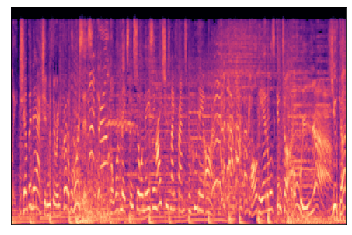

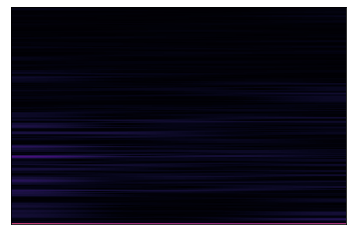

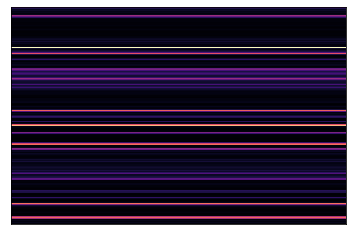

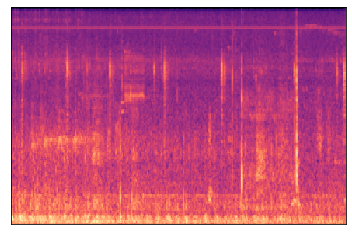

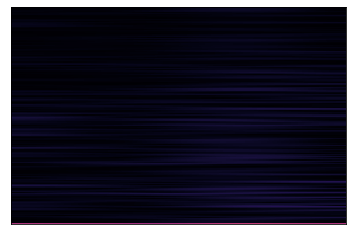

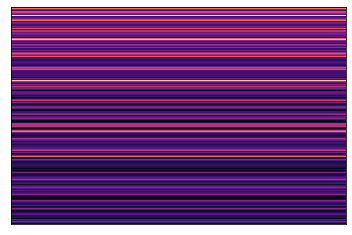

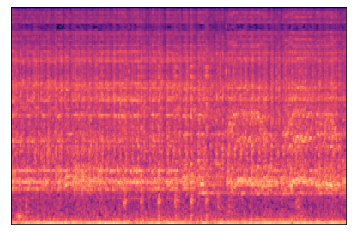

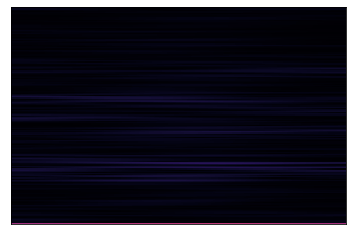

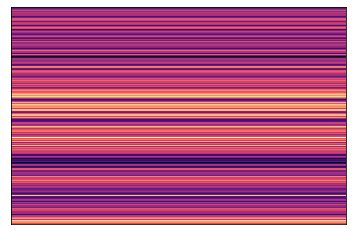

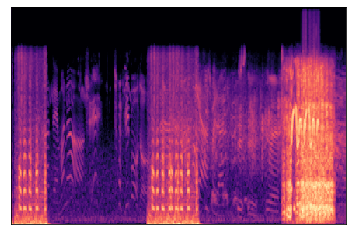

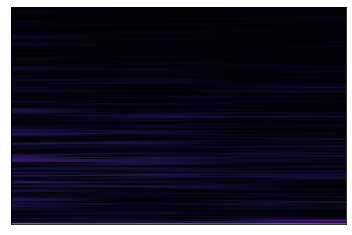

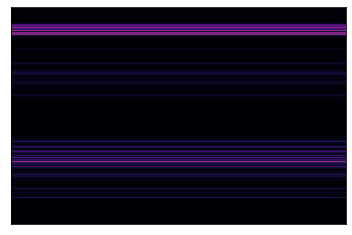

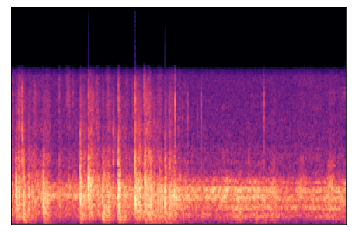

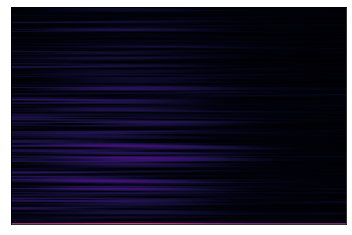

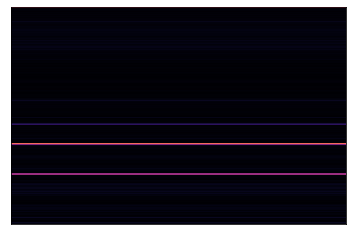

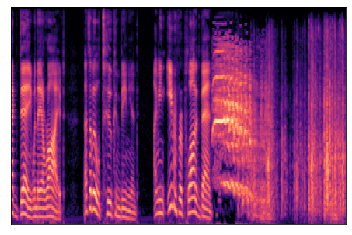

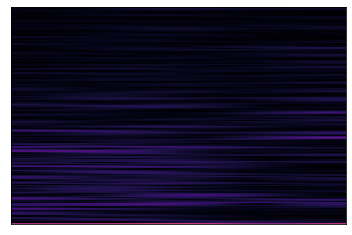

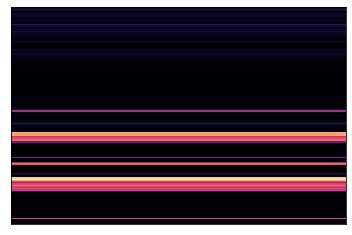

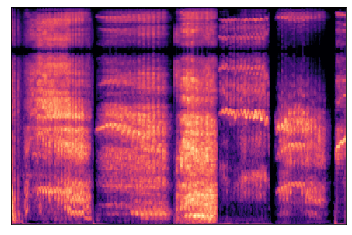

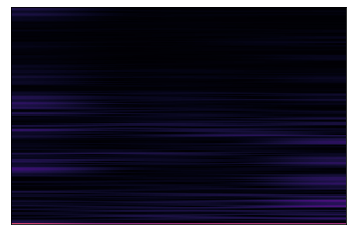

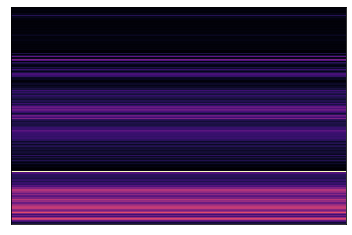

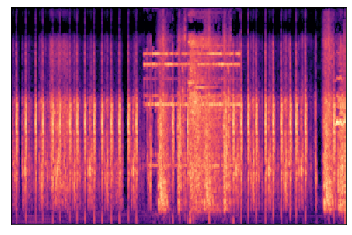

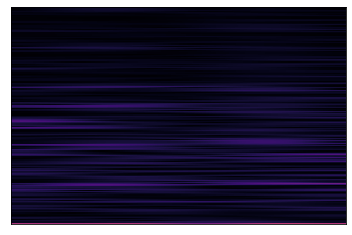

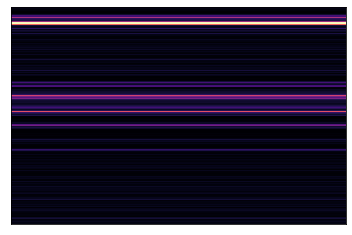

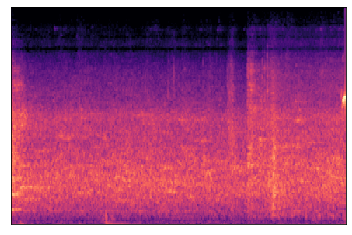

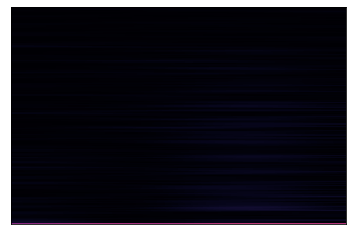

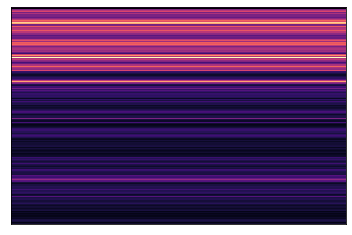

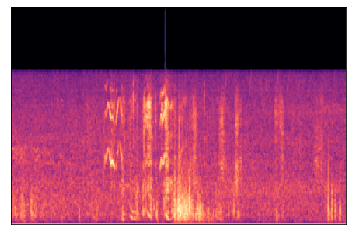

Error in callback <function flush_figures at 0x7f52a84be840> (for post_execute):


KeyboardInterrupt: 

In [2]:
id_n = 0

for filename in glob.iglob('./'+ '**/*.wav', recursive=True):
    cat = filename.split('/')[3][:-5]
    y, sr = librosa.load(filename)
    
    id_s = "{:04d}".format(id_n)
    if not os.path.exists('./data/mel/' + cat + '/'):
        os.makedirs('./data/mel/' + cat + '/')
    if not os.path.exists('./data/ftemp/' + cat + '/'):
        os.makedirs('./data/ftemp/' + cat + '/')
    if not os.path.exists('./data/sflat/' + cat + '/'):
        os.makedirs('./data/sflat/' + cat + '/')
        
    try:    
        mel_spec = librosa.feature.melspectrogram(y, sr)
        plt.figure()
        librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max))
        plt.savefig('./data/mel/' + cat + '/' + id_s + '.png')

        f_temp = librosa.feature.fourier_tempogram(y, sr)
        plt.figure()
        librosa.display.specshow(f_temp, sr=sr)
        plt.savefig('./data/ftemp/' + cat + '/' + id_s + '.png')

        s_flat = librosa.feature.spectral_flatness(y).T
        plt.figure()
        librosa.display.specshow(s_flat, sr=sr)
        plt.savefig('./data/sflat/' + cat + '/' + id_s + '.png')
    except:
        print(f'Error on {id_s}!')
    
    id_n += 1